# Hausdorff distance

## Theory

**Hausdorff Distance**


## Load dependencies

In [2]:
import pandas as pd
import numpy as np
import copy

from scipy import stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from sklearn.cluster import DBSCAN

In [5]:
from msci.utils import utils
from msci.analysis.networks import *
from msci.utils.plot import create_count_of_shoppers_gif, create_count_of_shoppers_image
from msci.utils.plot import plot_path_jn

In [6]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

In [7]:
from msci.analysis.complexity import pairwise_haussdorf_fast, position_dictionary, matrix_correlation

## Import raw data

In [8]:
signal_df = utils.import_signals('Mall of Mauritius', version=4, signal_type=1)

c:\users\tvb\envs\venv-msci\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [9]:
mac_address_df = utils.import_mac_addresses(version=3)
shopper_df = mac_address_df[mac_address_df.dbscan_label == 'Shopper']

In [10]:
cleaner_signal_df = signal_df[signal_df.mac_address.isin(shopper_df.mac_address)]

## Get data

In [11]:
analysis_mac_addresses = sorted(cleaner_signal_df.mac_address.unique().tolist()[:100] + cleaner_signal_df.mac_address.unique().tolist()[5000:5200])

pos_dict = position_dictionary(
    cleaner_signal_df[cleaner_signal_df.mac_address.isin(analysis_mac_addresses)].sort_values('mac_address'), 
    list_type=True
)

In [12]:
from scipy.spatial.distance import directed_hausdorff

In [13]:
haus = np.empty((len(pos_dict),len(pos_dict),))
haus[:] = np.nan

for i in tqdm(range(len(pos_dict))):
    for j in range(len(pos_dict)):
        haus[i][j] = directed_hausdorff(pos_dict[i], pos_dict[j])[0]

HBox(children=(IntProgress(value=0, max=300), HTML(value='')))

In [14]:
X = haus

## DBScan clustering

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X = StandardScaler().fit_transform(X)

In [17]:
db = DBSCAN(eps=9).fit(X)

In [18]:
labels = db.labels_

## Plots

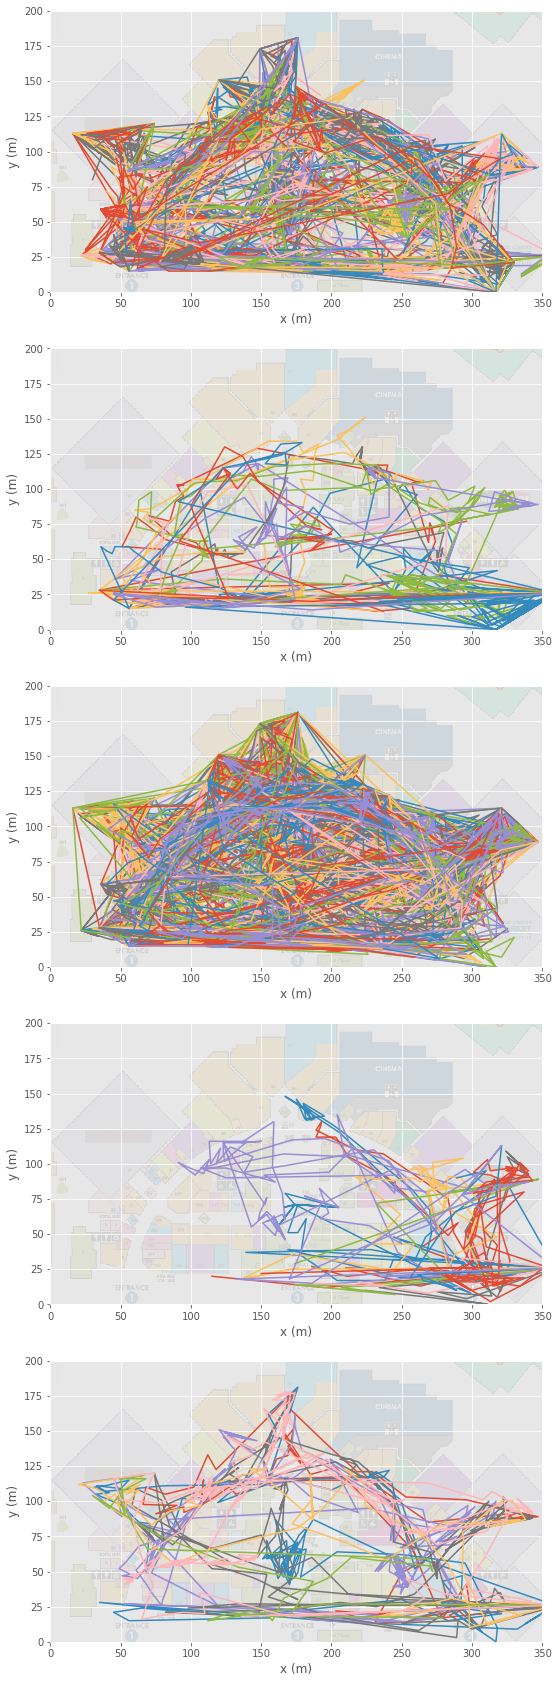

In [19]:
num_plots = max(labels) + 2

fig, ax = plt.subplots(nrows=num_plots, ncols=1, figsize=(16, 6 * num_plots))

for i in range(num_plots):
    plot_path_jn(
        signal_df, 
        list(np.array(analysis_mac_addresses)[np.where(labels==i-1)]), 
        axes=ax[i], 
        label=False
    )

In [20]:
csfont = {'fontname':'Times New Roman'}
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Times New Roman',style='normal', size=30)

In [21]:
community_path = r"C:\Users\tvb\OneDrive\Documents\Imperial\Year 4\Project\Report\Chapter5\Figs/"

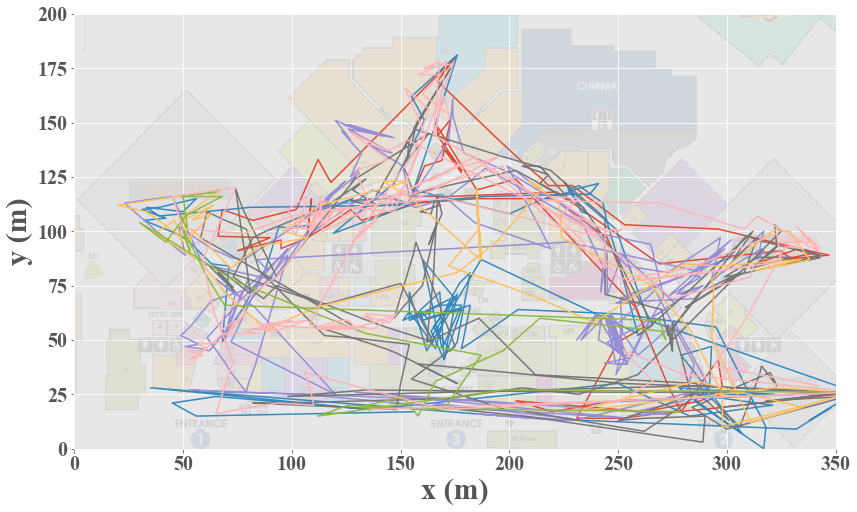

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

plot_path_jn(
    signal_df, 
    list(np.array(analysis_mac_addresses)[np.where(labels==num_plots-2)]), 
    axes=ax, 
    label=False
)

ax.set_ylabel('y (m)', fontsize=30, **csfont)
ax.set_xlabel('x (m)', fontsize=30, **csfont)
ax.tick_params(labelsize=20)
ax.set_xticklabels(ax.get_xticks().astype(int), csfont)
ax.set_yticklabels(ax.get_yticks().astype(int), csfont);

fig.savefig(community_path + 'hausdorff_cluster.png', transparent=True)